# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and OpenCV.

In [4]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.animation import FuncAnimation

# Define 2D Convolution Function
Define a function to perform 2D convolution on an input image using a given kernel.

In [5]:
# Define 2D Convolution Function
def convolve2d(image, kernel):
    """
    Perform a 2D convolution on an input image using a given kernel.
    
    Parameters:
    image (numpy.ndarray): Input image
    kernel (numpy.ndarray): Convolution kernel
    
    Returns:
    numpy.ndarray: Convolved image
    """
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image
    output = np.zeros_like(image)
    
    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)
    
    return output

# Load and Display Input Image
Load an input image using OpenCV and display it using Matplotlib.

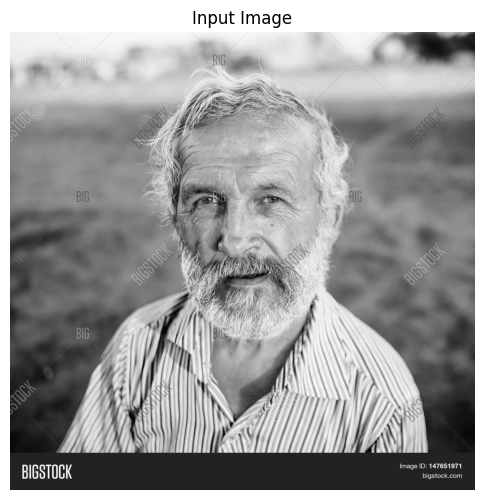

In [6]:
# Load and Display Input Image
# Load the input image using OpenCV
input_image = cv2.imread('portrait.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if input_image is None:
    raise ValueError("Image not found or unable to load.")

# Display the input image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

# Define Convolution Kernel
Define a convolution kernel (filter) to be used in the convolution process.

In [7]:
# Define Convolution Kernel
# Define a simple edge detection kernel (Sobel operator)
sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Display the kernel
print("Convolution Kernel (Sobel Operator):")
print(sobel_kernel)

Convolution Kernel (Sobel Operator):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


# Apply Convolution
Apply the 2D convolution function to the input image using the defined kernel.

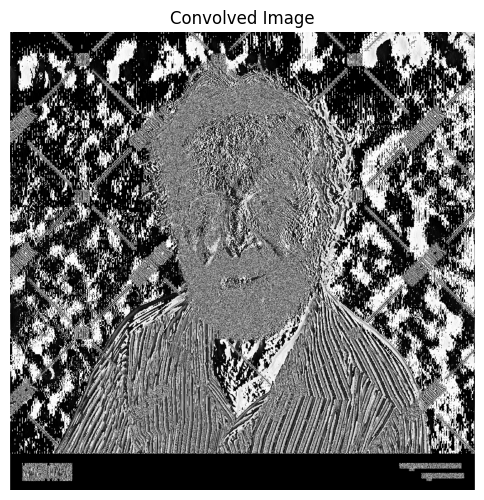

In [8]:
# Apply Convolution
# Apply the 2D convolution function to the input image using the defined kernel
convolved_image = convolve2d(input_image, sobel_kernel)

# Display the convolved image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')
plt.show()

# Visualize Convolution Process Dynamically
Create a dynamic visualization of the convolution process using Matplotlib animations.

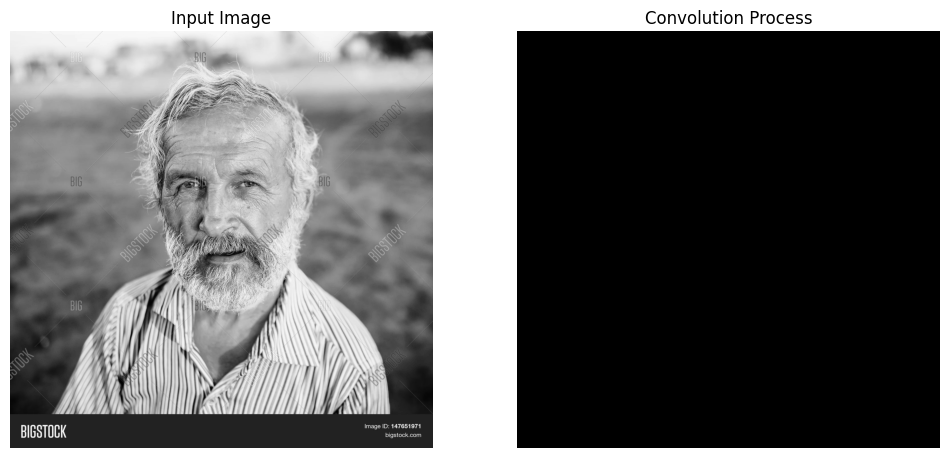

In [14]:
# Visualize Convolution Process Dynamically
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the input image
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title('Input Image')
ax[0].axis('off')

# Initialize the output image display
output_display = ax[1].imshow(np.zeros_like(input_image), cmap='gray')
ax[1].set_title('Convolution Process')
ax[1].axis('off')

# Get dimensions of the image and kernel
image_height, image_width = input_image.shape
kernel_height, kernel_width = sobel_kernel.shape

# Calculate the padding size
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# Pad the image with zeros on all sides
padded_image = np.pad(input_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

# Initialize the output image
output = np.zeros_like(input_image)

# Function to update the animation
def update(frame):
    i, j = frame
    region = padded_image[i:i + kernel_height, j:j + kernel_width]
    output[i, j] = np.sum(region * sobel_kernel)
    output_display.set_data(output)
    return [output_display]

# Create a list of frames to animate
frames = [(i, j) for i in range(image_height) for j in range(image_width)]

# Create the animation
ani = FuncAnimation(fig, update, frames=frames, blit=True, repeat=False)

plt.show()